In [3]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.datasets import load_iris

In [5]:
data_dict=load_iris()

In [6]:
df=pd.DataFrame(data=data_dict['data'],columns=data_dict['feature_names'])

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['Species']=data_dict['target']

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

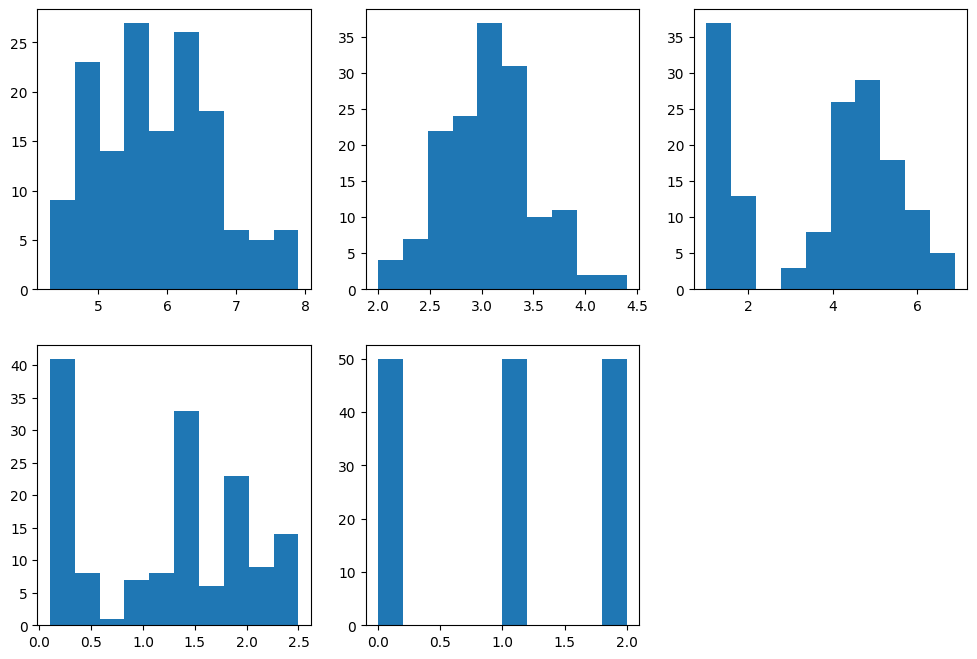

In [16]:
i=1
plt.figure(figsize=(12,8))
for col in df.columns:
    plt.subplot(2,3,i)
    plt.hist(df[col])
    i+=1

In [18]:
x=df.drop("Species",axis=1)
y=df['Species']

In [19]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [23]:
model=LogisticRegression(max_iter=1000)

In [24]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred=model.predict(x_test)

In [26]:
y_pred

array([2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1])

In [27]:
y_test

143    2
84     1
15     0
59     1
102    2
7      0
20     0
137    2
39     0
5      0
86     1
76     1
125    2
90     1
133    2
13     0
12     0
36     0
131    2
4      0
136    2
48     0
61     1
51     1
104    2
141    2
2      0
134    2
28     0
120    2
63     1
9      0
57     1
147    2
99     1
91     1
27     0
74     1
Name: Species, dtype: int32

In [28]:
import pickle

In [29]:
with open("iris_model.pickle", "wb") as file:
    pickle.dump(model,file)